In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

In [8]:
x_train=pd.read_csv("AVG\\AVG_train_x.csv")
y_train=pd.read_csv("AVG\\AVG_train_y.csv")
x_test=pd.read_csv("AVG\\AVG_test_x.csv")
y_test=pd.read_csv("AVG\\AVG_test_y.csv")

In [6]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [5]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [7]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])
x_test=x_test.drop(columns=["T_ID", "YEAR"])

In [11]:
x_train=x_train.drop(columns=["T_ID", "YEAR"])
x_test=x_test.drop(columns=["T_ID", "YEAR"])
y_train=y_train.drop(columns=["T_ID", "YEAR"])
y_test=y_test.drop(columns=["T_ID", "YEAR"])

In [12]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              48128     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 3,197,953
Trainable params: 3,197,953
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(
  x_train, y_train,
  epochs=100, validation_split = 0.2, verbose=1,
  callbacks=[PrintDot()])

W0923 14:50:23.508595 20768 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 2336 samples, validate on 584 samples
Epoch 1/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 13.4808 - mae: 0.5516 - mse: 13.4808 - val_loss: 0.0049 - val_mae: 0.0648 - val_mse: 0.0049
Epoch 2/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0330 - mae: 0.1233 - mse: 0.0330 - val_loss: 0.0049 - val_mae: 0.0656 - val_mse: 0.0049
Epoch 3/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0063 - mae: 0.0702 - mse: 0.0063 - val_loss: 0.0020 - val_mae: 0.0402 - val_mse: 0.0020
Epoch 4/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0021 - mae: 0.0392 - mse: 0.0021 - val_loss: 0.0012 - val_mae: 0.0311 - val_mse: 0.0012
Epoch 5/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 0.0010 - mae: 0.0255 - mse: 0.0010 - val_loss: 0.0021 - val_mae: 0.0427 - val_mse: 0.0021
Epoch 6/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 6.7632e-04 - mae: 0.0209 - 

Epoch 45/100
2336/2336 [==============================] - 4s 2ms/sample - loss: 3.2601e-04 - mae: 0.0141 - mse: 3.2601e-04 - val_loss: 5.0101e-04 - val_mae: 0.0183 - val_mse: 5.0101e-04
Epoch 46/100
2336/2336 [==============================] - 4s 2ms/sample - loss: 3.2260e-04 - mae: 0.0142 - mse: 3.2260e-04 - val_loss: 0.0014 - val_mae: 0.0329 - val_mse: 0.0014
Epoch 47/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 3.0104e-04 - mae: 0.0136 - mse: 3.0104e-04 - val_loss: 0.0011 - val_mae: 0.0291 - val_mse: 0.0011
Epoch 48/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 3.1370e-04 - mae: 0.0136 - mse: 3.1370e-04 - val_loss: 9.3671e-04 - val_mae: 0.0263 - val_mse: 9.3671e-04
Epoch 49/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 3.2637e-04 - mae: 0.0139 - mse: 3.2637e-04 - val_loss: 4.3938e-04 - val_mae: 0.0166 - val_mse: 4.3938e-04
Epoch 50/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 3.0633

2336/2336 [==============================] - 4s 2ms/sample - loss: 1.8584e-04 - mae: 0.0103 - mse: 1.8584e-04 - val_loss: 5.6800e-04 - val_mae: 0.0194 - val_mse: 5.6800e-04
Epoch 90/100
2336/2336 [==============================] - 4s 2ms/sample - loss: 1.9934e-04 - mae: 0.0106 - mse: 1.9934e-04 - val_loss: 0.0011 - val_mae: 0.0279 - val_mse: 0.0011
Epoch 91/100
2336/2336 [==============================] - 3s 1ms/sample - loss: 1.9585e-04 - mae: 0.0105 - mse: 1.9585e-04 - val_loss: 0.0012 - val_mae: 0.0290 - val_mse: 0.0012
Epoch 92/100
2336/2336 [==============================] - 4s 2ms/sample - loss: 1.7878e-04 - mae: 0.0102 - mse: 1.7878e-04 - val_loss: 9.6076e-04 - val_mae: 0.0261 - val_mse: 9.6076e-04
Epoch 93/100
2336/2336 [==============================] - 4s 2ms/sample - loss: 1.8968e-04 - mae: 0.0104 - mse: 1.8968e-04 - val_loss: 8.4661e-04 - val_mae: 0.0248 - val_mse: 8.4661e-04
Epoch 94/100
2336/2336 [==============================] - 4s 2ms/sample - loss: 1.8708e-04 - mae: 0

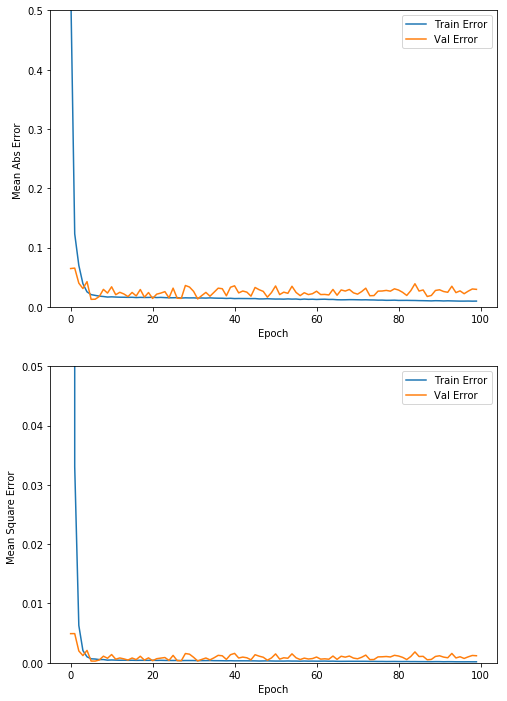

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error ')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error ')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.05])
  plt.legend()
  plt.show()

plot_history(history)

In [22]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("테스트 세트의 mae: {:5.4f} ".format(mae))
print("테스트 세트의 mse: {:5.4f} ".format(mse))

W0923 15:01:08.468602 20768 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


50/50 - 0s - loss: 8.9769e-04 - mae: 0.0236 - mse: 8.9769e-04
테스트 세트의 mae: 0.0236 
테스트 세트의 mse: 0.0009 


In [25]:
y_test=pd.read_csv("AVG\\AVG_test_y.csv")
y_TID=y_test["T_ID"]
y_YEAR=y_test["YEAR"]

In [27]:
pred=model.predict(x_test)
y_test["pred"]=pred
y_test['T_ID']=y_TID
y_test['YEAR']=y_YEAR
y_test=y_test[['YEAR', 'T_ID', 'AVG', 'pred']]

W0923 15:05:01.964802 20768 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


In [28]:
y_test

,YEAR,T_ID,AVG,pred
0,2016,HH,0.288575,0.297150
1,2016,HT,0.256739,0.288641
2,2016,KT,0.295455,0.306509
3,2016,LG,0.296069,0.298234
4,2016,LT,0.309893,0.313507
5,2016,NC,0.287440,0.317644
6,2016,OB,0.298225,0.285140
7,2016,SK,0.305263,0.273281
8,2016,SS,0.283863,0.305678
9,2016,WO,0.289941,0.315223


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test['AVG'], pred)

In [33]:
mse

0.0008976920179115332

In [34]:
len(x_train.keys())

46